# Homework 2 on Logistic Regression

This implementation of the logistic regression is the same as what you have leraned in the class. Therefore, it is important that you become familiar with every single line of the codes and know its meaning.

However, this code does not use any basis function and does not use the Hessian matrix but a fixed learning ratio in the gradient descent method to train.

Task 1. Know the meaning of this implementation in the line-by-line manner.

Task 2. Enhance in a whatever way you want, e.g., implementing a basis function, implementing another optimizer instead of the gradient descent.

Submit a report for Task 2 only. Describe how you updated the codes and its decision boundary visualization (see the Plotting the decision boundary section). If you applied a basis function, draw the decision boundary in the space spanned by the bases.

### Load the Data and Libraries

In [12]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [14]:
import pandas as pd
import io
# from google.colab import files
# import from drive
# from google.colab import drive
# drive.mount('/content/drive')

# uploaded = files.upload()

data=pd.read_csv("/Users/eliasfirisa/Desktop/Hw3ML/data (1).csv",index_col="t")
data.head()



x1         x2
t                      
0  34.623660  78.024693
0  30.286711  43.894998
0  35.847409  72.902198
1  60.182599  86.308552
1  79.032736  75.344376

In [16]:
# data=pd.read_csv('/content/drive/MyDrive/spring2025/Machine Learning/data.csv')
data.head()

x1         x2
t                      
0  34.623660  78.024693
0  30.286711  43.894998
0  35.847409  72.902198
1  60.182599  86.308552
1  79.032736  75.344376

In [17]:
data.shape


(100, 2)

In [18]:
feature = data[["x1", "x2"]].values
class_label = data.index.values
feature[0:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

### Visualize the Data

In [23]:
# class_label.shape
# class0=class_label==1

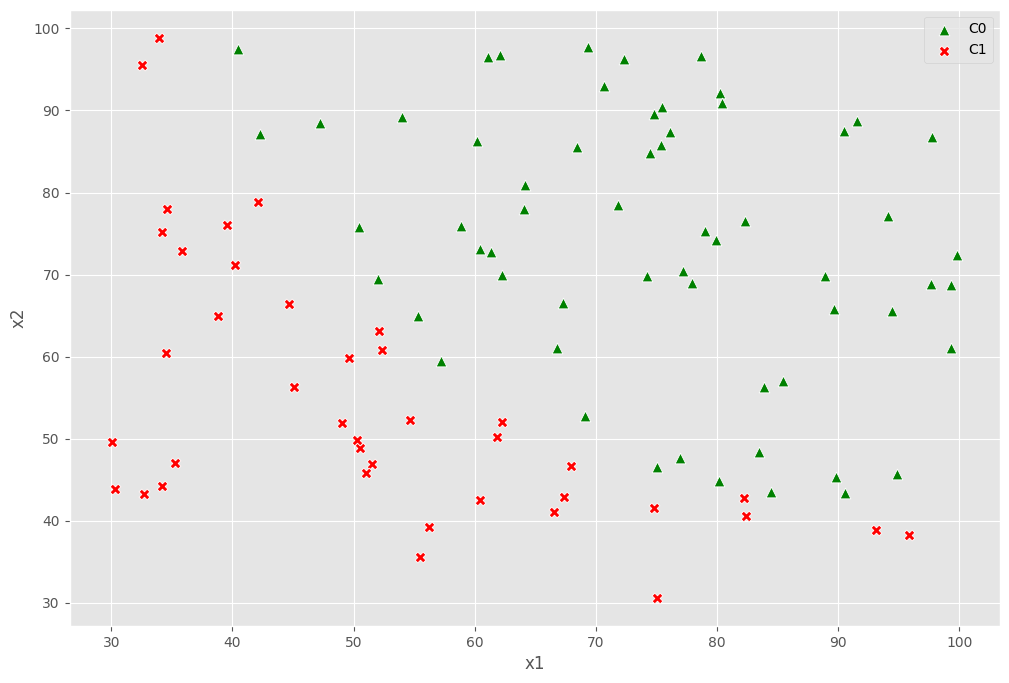

In [19]:
class_c0 = (class_label ==1).reshape(100, 1)
class_c1 = (class_label == 0).reshape(100, 1)

ax = sns.scatterplot(x = feature[class_c0[:, 0], 0],
                     y = feature[class_c0[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = feature[class_c1[:, 0], 0],
                y = feature[class_c1[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="x1", ylabel="x2")
ax.legend(["C0", "C1"])
plt.show();

### Neural Network with 1-hidden layer

#1 Architecture:
 Input layer (2 neurons)
Hidden layer (3 neurons with ReLU activation)
Output layer (1 neuron with sigmoid activation)

Input Layer (2 neurons): x1, x2
   |
   V
Hidden Layer (3 neurons): h1, h2, h3
   |
   V
Output Layer (1 neuron): y_pred

In [20]:
#He initialization
#He initialization is a method of initializing the weights of a neural network
def he_init(size):
    fan_in=size[0]
    std=np.sqrt(2.0/fan_in)
    return np.random.randn(*size)*std


In [32]:
#Activation Function:function that is applied to the output of a neuron to introduce non-linearity into the network
def relu(x):
    return np.max(0,x)
def drelu(x):
    return (x>0).astype(float)


In [33]:
# sigmoid activation function
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [34]:
#Forward Propagation
def forward_prop(X,params):
    w1,b1,w2,b2=params
    # hidden layer
    z1=np.dot(X,w1)+b1
    a1=relu(z1)
    # output layer
    z2=np.dot(a1,w2)+b2
    a2=sigmoid(z2)
    return z1,a1,z2,a2
    

In [35]:
#Backward propagation
def back_prop(X,y,params,z1,a1,z2,a2):
    m = X.shape[0]
    W1, b1, W2, b2 = params
    
    # Output layer gradients
    dZ2 = a2 - y
    dW2 = (1/m) * np.dot(a1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * drelu(z1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2
    
    
    

In [36]:

 # Adam Optimizer:
    # 1. Compute velocity and squared gradient
    # 2. Bias correction of velocity and squared gradient
    # 3. Update parameters with corrected velocity and squared gradient

def adam_optimizer(params, gradients, v, s, t, beta1=0.9, beta2=0.999, epsilon=1e-8, learning_rate=0.01):
    W1, b1, W2, b2 = params
    dW1, db1, dW2, db2 = gradients
    
    # Update velocity and squared gradients
    v["dW1"] = beta1 * v["dW1"] + (1 - beta1) * dW1
    v["db1"] = beta1 * v["db1"] + (1 - beta1) * db1
    v["dW2"] = beta1 * v["dW2"] + (1 - beta1) * dW2
    v["db2"] = beta1 * v["db2"] + (1 - beta1) * db2
    
    s["dW1"] = beta2 * s["dW1"] + (1 - beta2) * (dW1 ** 2)
    s["db1"] = beta2 * s["db1"] + (1 - beta2) * (db1 ** 2)
    s["dW2"] = beta2 * s["dW2"] + (1 - beta2) * (dW2 ** 2)
    s["db2"] = beta2 * s["db2"] + (1 - beta2) * (db2 ** 2)
    
    # Bias correction
    v_corrected = {}
    s_corrected = {}
    for key in v.keys():
        v_corrected[key] = v[key] / (1 - beta1 ** t)
        s_corrected[key] = s[key] / (1 - beta2 ** t)
    
    # Update parameters
    W1 -= learning_rate * v_corrected["dW1"] / (np.sqrt(s_corrected["dW1"]) + epsilon)
    b1 -= learning_rate * v_corrected["db1"] / (np.sqrt(s_corrected["db1"]) + epsilon)
    W2 -= learning_rate * v_corrected["dW2"] / (np.sqrt(s_corrected["dW2"]) + epsilon)
    b2 -= learning_rate * v_corrected["db2"] / (np.sqrt(s_corrected["db2"]) + epsilon)
    
    return W1, b1, W2, b2
   


In [37]:
# Training Loop
def train(X, y, epochs=1000, learning_rate=0.01):
    '''
    Train a neural network with one hidden layer.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Features
    y : array-like, shape (n_samples,)
        Target
    epochs : int, optional
        Number of epochs, by default 1000
    learning_rate : float, optional
        Learning rate, by default 0.01
    '''
    # Initialize parameters
    np.random.seed(42)  # Fixed seed
    W1 = he_init((2, 3))  # Input to hidden
    b1 = np.zeros((1, 3))
    W2 = he_init((3, 1))  # Hidden to output
    b2 = np.zeros((1, 1))
    
    # Initialize Adam optimizer
    v = {
        "dW1": np.zeros((2, 3)),
        "db1": np.zeros((1, 3)),
        "dW2": np.zeros((3, 1)),
        "db2": np.zeros((1, 1))
    }
    s = {key: np.zeros_like(value) for key, value in v.items()}
    
    costs = []
    for t in range(1, epochs + 1):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_prop(X, (W1, b1, W2, b2))
        
        # Compute cost
        cost = compute_cost(A2, y)
        costs.append(cost)
        
        # Backward propagation
        gradients = backward_prop(X, y, (W1, b1, W2, b2), Z1, A1, Z2, A2)
        
        # Update parameters using Adam
        W1, b1, W2, b2 = adam_optimizer(
            (W1, b1, W2, b2), gradients, v, s, t, learning_rate=learning_rate
        )
        
        if t % 100 == 0:
            print(f"Epoch {t}/{epochs}, Cost: {cost:.4f}")
    
    return (W1, b1, W2, b2), costs





In [38]:
def plot_decision_boundary(X, y, params):
    W1, b1, W2, b2 = params
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Make predictions
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, Z = forward_prop(X_grid, (W1, b1, W2, b2))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("Decision Boundary")
    plt.show()

In [30]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 307 kB 13.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and labels
X = data[['x1', 'x2']].values
y = data.index.values.reshape(-1, 1)

# Normalize the features (important for neural networks)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Convert labels to binary (if they're not already)
y = y.astype(float)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
np.random.seed(42)
W1 = he_init((2, 3))  # (input_features, hidden_neurons)
b1 = np.zeros((1, 3))
W2 = he_init((3, 1))  # (hidden_neurons, output_neurons)
b2 = np.zeros((1, 1))

# Initialize Adam optimizer variables
v = {
    "dW1": np.zeros_like(W1),
    "db1": np.zeros_like(b1),
    "dW2": np.zeros_like(W2),
    "db2": np.zeros_like(b2)
}
s = {key: np.zeros_like(value) for key, value in v.items()}

# Training parameters
epochs = 1000
learning_rate = 0.01
costs = []

# Training loop
for t in range(1, epochs + 1):
    Z1, A1, Z2, A2 = forward_prop(X_train, (W1, b1, W2, b2))
    cost = compute_cost(A2, y_train)
    costs.append(cost)
    
    gradients = backward_prop(X_train, y_train, (W1, b1, W2, b2), Z1, A1, Z2, A2)
    W1, b1, W2, b2 = adam_optimizer(
        (W1, b1, W2, b2), gradients, v, s, t, learning_rate=learning_rate
    )
    
    if t % 100 == 0:
        print(f"Epoch {t}/{epochs}, Cost: {cost:.4f}")

# Evaluate on training data
_, _, _, y_pred_train = forward_prop(X_train, (W1, b1, W2, b2))
train_accuracy = np.mean((y_pred_train > 0.5).astype(int) == y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on test data
_, _, _, y_pred_test = forward_prop(X_test, (W1, b1, W2, b2))
test_accuracy = np.mean((y_pred_test > 0.5).astype(int) == y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualization
plt.figure(figsize=(12, 5))

# Plot decision boundary
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, (W1, b1, W2, b2))
plt.title("Decision Boundary")

# Plot cost curve
plt.subplot(1, 2, 2)
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Cost Curve')
plt.tight_layout()
plt.show()


TypeError: only integer scalar arrays can be converted to a scalar index

### Define the Logistic Sigmoid Function $\sigma(z)$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [16]:
def basis_transform(X, degree=2):
    """
    Transform input features into a polynomial basis.
    For two features and degree=2, this returns:
      [1, x1, x2, x1^2, x1*x2, x2^2]
    X should be of shape (m, 2).
    """
    m, n = X.shape  # here n should be 2
    x1 = X[:, 0].reshape(-1, 1)
    x2 = X[:, 1].reshape(-1, 1)
    ones = np.ones((m, 1))
    if degree == 1:
        # Only linear terms (plus intercept)
        return np.hstack([ones, x1, x2])
    elif degree == 2:
        # Quadratic basis: 1, x1, x2, x1^2, x1*x2, x2^2
        return np.hstack([ones, x1, x2, x1**2, x1*x2, x2**2])
    else:
        # You can extend this to higher degrees if needed.
        raise NotImplementedError("Higher degrees not implemented yet.")

In [17]:
def logistic_function(x):
    return 1/ (1 + np.exp(-x))

### Compute the Cost Function $J(\theta)$ and Gradient

$h_{\boldsymbol \theta}(\boldsymbol x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \boldsymbol \theta^T \boldsymbol x$.

The objective of logistic regression is to minimize the cost function

$$J(\boldsymbol \theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\boldsymbol \theta}(\boldsymbol x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\boldsymbol \theta}(\boldsymbol x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\boldsymbol \theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\boldsymbol \theta}(\boldsymbol x^{(i)}) - y^{(i)})\boldsymbol x_j^{(i)}.$$

In [18]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

### Cost and Gradient at Initialization

In [19]:
mean_scores = np.mean(feature, axis=0)
std_scores = np.std(feature, axis=0)
scores = (feature - mean_scores) / std_scores #standardization

rows = feature.shape[0]
cols = feature.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = class_label.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

Minimize the cost function $J(\boldsymbol \theta)$ by updating the below equation and repeat until convergence:
$\boldsymbol \theta_{j+1} := \boldsymbol \theta_j - \alpha \frac{\partial J(\boldsymbol \theta)}{\partial \boldsymbol \theta_j}$.

See https://en.wikipedia.org/wiki/Gradient_descent.

In [20]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [21]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)

In [22]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200)
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
Resulting cost: 0.20360044248554293


### Plotting the Convergence of $J(\boldsymbol \theta)$

Plot $J(\boldsymbol \theta)$ against the number of iterations of gradient descent:

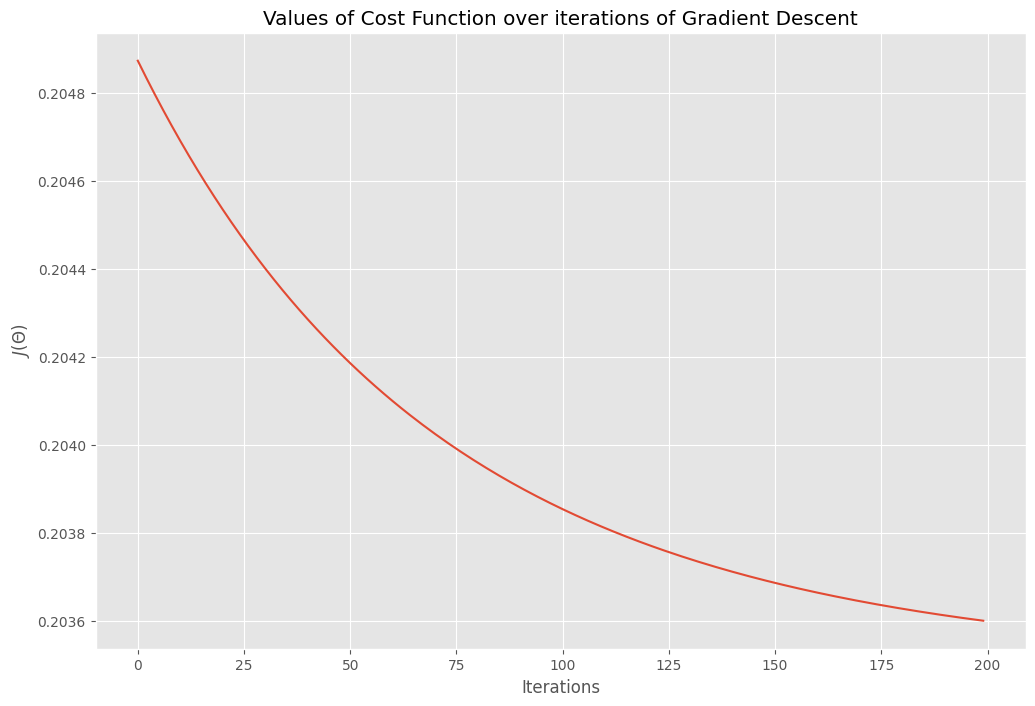

In [23]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");



```
# 코드로 형식 지정됨
```

### Plotting the decision boundary

$h_{\boldsymbol \theta}(\boldsymbol x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \boldsymbol \theta^T \boldsymbol x$

When $h_{\boldsymbol \theta}(\boldsymbol x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\boldsymbol \theta^T \boldsymbol x) \geq 0.5$

$\implies \boldsymbol \theta^T \boldsymbol x \geq 0$ predict class "1"

Hence, $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$ is the equation for the decision boundary, giving us

$ x_2 = \frac{-(\theta_0+\theta_1x_1)}{\theta_2}$

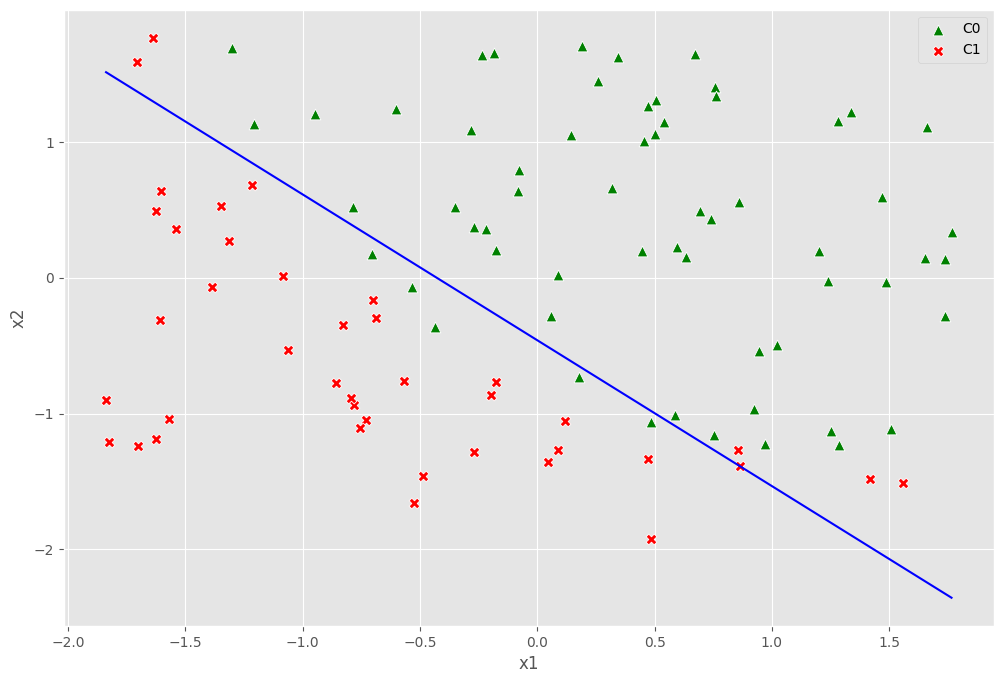

In [24]:
sns.scatterplot(x = X[class_c0[:, 0], 1],
                y = X[class_c0[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[class_c1[:, 0], 1],
                    y = X[class_c1[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["C0", "C1"])
ax.set(xlabel="x1", ylabel="x2")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### Predictions using the optimized $\theta$ values

In [25]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0


In [26]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 89 %


In [27]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")



test = np.array([50,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A test sample who x1 = 50 and x2 = 79 will be in the class of C0 in the probability of ",
      np.round(probability[0], 2))

Training Accuracy: 89 %
A test sample who x1 = 50 and x2 = 79 will be in the class of C0 in the probability of  0.74
